In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Set the matplotlib to display plots inline
%matplotlib inline


# Function to calculate average of numeric columns for each dataset and model
def calculate_average(files):
    # Initialize a dictionary to store sum and count for each dataset and model
    sum_values = {}
    count = 0
    
    # Iterate through each file
    for file in files:
        # Read the CSV file
        df = pd.read_csv(file)
        
        # Iterate through each row in the DataFrame
        for index, row in df.iterrows():
            dataset_model = (row['Dataset Name'], row['Model'])
            if dataset_model not in sum_values:
                sum_values[dataset_model] = {'Accuracy': 0, 'F1_score': 0, 'RMSE': 0, 'count': 0}
            sum_values[dataset_model]['Accuracy'] += row['Accuracy']
            sum_values[dataset_model]['F1_score'] += row['F1_score']
            sum_values[dataset_model]['RMSE'] += row['RMSE']
            sum_values[dataset_model]['count'] += 1
            count += 1
    
    # Calculate average values for each dataset and model
    average_values = {}
    for dataset_model, values in sum_values.items():
        average_values[dataset_model] = {
            'Accuracy': values['Accuracy'] / values['count'],
            'F1_score': values['F1_score'] / values['count'],
            'RMSE': values['RMSE'] / values['count']
        }
    
    return average_values, count

# List all CSV files in the folders
folder_names = ['t1', 't2', 't3', 't4', 't5']
file_paths = [os.path.join(folder, 'supervisedCombined_report.csv') for folder in folder_names]

# Calculate average
average_values, total_rows = calculate_average(file_paths)

# Create a DataFrame with average values
average_data = []
for dataset_model, values in average_values.items():
    dataset, model = dataset_model
    average_data.append([dataset, model, values['Accuracy'], values['F1_score'], values['RMSE']])

average_df = pd.DataFrame(average_data, columns=['Dataset Name', 'Model', 'Average Accuracy', 'Average F1_score', 'Average RMSE'])

# Write the DataFrame to a new CSV file
#average_df.to_csv('average_report_with_respect_to_dataset_and_model.csv', index=False)


In [2]:
average_df

,Dataset Name,Model,Average Accuracy,Average F1_score,Average RMSE
0,HeartDisease,NextConvGeN,0.566887,0.563145,0.871692
1,HeartDisease,CTGAN,0.507781,0.488166,1.373808
2,HeartDisease,convexCTGAN,0.492053,0.489265,1.615434
3,HeartDisease,CTABGAN,0.411424,0.410631,1.204984
4,HeartDisease,convexCTABGAN,0.388907,0.328448,0.993251
5,HeartDisease,TabDDPM,0.575662,0.571607,1.240693
6,LungCancer,NextConvGeN,0.617283,0.615573,NaN
7,LungCancer,CTGAN,0.523876,0.520103,NaN
8,LungCancer,convexCTGAN,0.531768,0.522433,NaN
9,LungCancer,CTABGAN,0.532867,0.511479,NaN


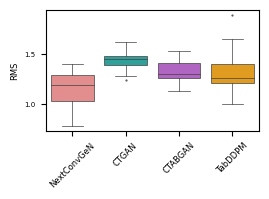

In [3]:

# Define custom colors
custom_palette = ["lightcoral", "lightseagreen", "mediumorchid", "orange", "burlywood", "cornflowerblue"]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()
flierprops =dict(marker='o', markersize=0.5, linestyle='none')

# Iterate over each subfolder
for folder in ['t1', 't2', 't3', 't4', 't5']:
    # Get the path to the CSV file
    csv_file = os.path.join(folder, 'supervisedCombined_report.csv')
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Concatenate the DataFrame with the combined data
    combined_data = pd.concat([combined_data, df[~(df["Model"].isin(["convexCTGAN", "convexCTABGAN", "TVAE"]))]], ignore_index=True)

width_inches = 7/ 2.54
height_inches = 4 / 2.54

# Create a box plot for each model with custom colors
plt.figure(figsize=(width_inches, height_inches))
sns.boxplot(data=combined_data, x='Model', y="RMSE", palette=custom_palette, linewidth=0.5, flierprops=flierprops)
#plt.title('Box Plot of F1 Scores for Different Models')
plt.xlabel('', fontsize=6)
plt.ylabel('RMS', fontsize=6)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=5)
plt.grid(False)
plt.savefig('RMS.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
def plot_and_save(structured_array, model_name=None):
    plt.figure(figsize=(8, 8))

    thresholds = np.unique(structured_array['Threshold'])
    colors = ['grey', 'green', 'blue', 'red']

    for i, t in enumerate(thresholds):
        accuracy_subset = structured_array[structured_array['Threshold'] == t]['Accuracy']
        precision_subset = structured_array[structured_array['Threshold'] == t]['Precision']
        access_subset = structured_array[structured_array['Threshold'] == t]['Access']

        # Round off the threshold value to 1 decimal point for legend
        rounded_threshold = round(t, 1)

        plt.plot(access_subset, precision_subset, label=f'Threshold={rounded_threshold}', linestyle='-', marker='o', color=colors[i])

    plt.xlabel('Access', fontsize=18)
    plt.ylabel('Precision', fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # Set legend with specific font size
    plt.legend(fontsize=18)

    plt.xlim(0.15, 1.05)
    plt.ylim(0, 1)

    if model_name is not None:
        # Save the plot with high resolution to the specified file path and name
        plt.savefig(f'{model_name}.png', dpi=300)
    else:
        plt.savefig('plot.png', dpi=300)
    plt.close()

# File paths for saved numpy files
file_paths = [
    "avg_nextconvgen.npy",
    "avg_ctgan.npy",
    "avg_CTABGAN.npy",
    "avg_tabddpm.npy"
]

# Model names
model_names = [
    "NextConvGeN",
    "CTGAN",
    "CTABGAN",
    "TabDDPM"
]

# Load each numpy file and plot
for file_path, model_name in zip(file_paths, model_names):
    avg_data = np.load(file_path)
    plot_and_save(avg_data, model_name)
